# Importing librarys

In [281]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.io as pio
pio.renderers.default='notebook'

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

# Import data

## Import calendar

In [243]:
calendar = pd.read_csv('data/calendar.csv')

In [279]:
calendar.dtypes

listing_id             int64
date          datetime64[ns]
available             object
price                float64
dtype: object

In [244]:
calendar.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

### Formatting data

#### "date" to datetime

In [245]:
calendar.date = pd.to_datetime(calendar.date)

#### "price" to float

In [246]:
calendar.price = calendar.price.str.replace('\$|\,', '').astype(float)

In [247]:
calendar.head(1)

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0


## Import listings

In [248]:
listings = pd.read_csv('data/listings.csv')

In [286]:
listings[['id', 'last_scraped', 'name', 'description', 'neighborhood_overview', 'host_id', 'host_name', 'host_since',
 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state',
 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
 'bed_type', 'amenities', 'price', 'number_of_reviews', 'first_review', 'last_review', 'review_scores_rating',
 'review_scores_accuracy', 'review_scores_location', 'reviews_per_month']].dtypes

id                                int64
last_scraped                     object
name                             object
description                      object
neighborhood_overview            object
host_id                           int64
host_name                        object
host_since                       object
street                           object
neighbourhood                    object
neighbourhood_cleansed           object
neighbourhood_group_cleansed     object
city                             object
state                            object
latitude                        float64
longitude                       float64
property_type                    object
room_type                        object
accommodates                      int64
bathrooms                       float64
bedrooms                        float64
beds                            float64
bed_type                         object
amenities                        object
price                           float64


### Formatting data

#### "price" to float

In [249]:
listings.price = listings.price.str.replace('\$|\,', '').astype(float)

In [250]:
listings.shape

(3818, 92)

In [251]:
listings.sample(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
2502,5057466,https://www.airbnb.com/rooms/5057466,20160104002432,2016-01-04,1910 Neoclassical in Ravenna,Welcome to this charming home with modern amen...,The home is a quiet haven in the middle of the...,Welcome to this charming home with modern amen...,none,"Ravenna is a great residential neighborhood, w...",NaN,Public transport (numerous bus lines) is two s...,https://a1.muscache.com/ac/pictures/63302115/0...,https://a1.muscache.com/im/pictures/63302115/0...,https://a1.muscache.com/ac/pictures/63302115/0...,https://a1.muscache.com/ac/pictures/63302115/0...,25041496,https://www.airbnb.com/users/show/25041496,Eli,2014-12-20,"Seattle, Washington, United States","I like dining in, eating out, reading, cozy ev...",within an hour,100%,100%,t,https://a2.muscache.com/ac/users/25041496/prof...,https://a2.muscache.com/ac/users/25041496/prof...,Ravenna,1.0,1.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"17th Avenue Northeast, Seattle, WA 98115, Unit...",Ravenna,Ravenna,Other neighborhoods,Seattle,WA,98115,Seattle,"Seattle, WA",US,United States,47.674519,-122.308917,t,House,Private room,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",NaN,84.0,$539.00,"$1,996.00",NaN,NaN,2,$29.00,1,1125,2 months ago,t,29,59,88,363,2016-01-04,31,2015-04-19,2015-12-21,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,t,flexible,f,f,1,3.56


## Import reviews

In [252]:
reviews = pd.read_csv('data/reviews.csv')

In [287]:
reviews.dtypes

listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object

In [253]:
reviews.head(1)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...


# Scanning the data

#### Number unique listings

In [254]:
len(listings.id.unique())

3818

#### Number of hosts

In [255]:
len(listings.host_id.unique())

2751

#### Neighbourhood columns

In [256]:
listings[['neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed']].isnull().sum()

neighbourhood                   416
neighbourhood_cleansed            0
neighbourhood_group_cleansed      0
dtype: int64

# Business Questions

# When is the most likely time for you to visit Seattle?

#### To answer the first question we are going to look at the number of available rooms by month

#### Number of non-available rooms by month

In [266]:
calendar[calendar.available == 'f'].groupby(calendar.date.dt.month).listing_id.nunique().reset_index().rename(
columns= {'listing_id': 'Non-available rooms'}).head(1)

,date,Non-available rooms
0,1,3007


In [291]:
fig = px.line(
    calendar[calendar.available == 'f'].groupby(calendar.date.dt.month).listing_id.nunique().reset_index(
    ).rename(columns= {'listing_id': 'Non-available rooms'}),
    x= 'date', y= 'Non-available rooms', title= 'Number of accommodation rented at least once by month')
fig.show()

#### Number of days rented per month

In [267]:
calendar[calendar.available == 'f'].groupby(calendar.date.dt.month).listing_id.count().reset_index(
).rename(columns= {'listing_id': 'Number of days rented'}).head(1)

,date,Number of days rented
0,1,49603


In [268]:
fig = px.line(
    calendar[calendar.available == 'f'].groupby(calendar.date.dt.month).listing_id.count().reset_index(
).rename(columns= {'listing_id': 'Number of days rented'}),
    x= 'date', y= 'Number of days rented', title= 'Number of days rented by month')
fig.show()

#### Answers:
- The busiest months to visit Seattle are January, June, July and August.
    - We can also see that in january we have a great number of rooms rented for a long period;
    - But in the summer (June, july and august) we see less rooms rented for more days.

# How can we group your properties in order to find local peculiarities?

In [346]:
# Create Figure
px.set_mapbox_access_token(open("mapbox_token.txt").read())
fig = px.scatter_mapbox(listings.sample(500),
    lat= "latitude", lon= "longitude", color= "price", hover_name= 'id',
    zoom=10, width= 550, height= 650, title= 'Price by accommodation')

In [347]:
fig.show()

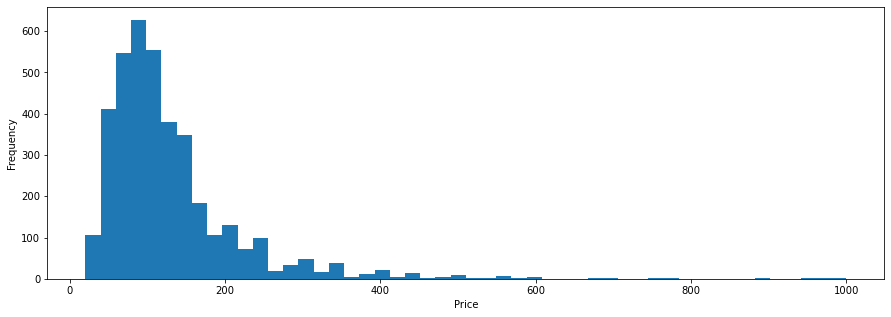

In [350]:
plt.Figure()
listings.price.plot.hist(bins= 50, figsize= (15, 5))
plt.xlabel('Price')
plt.ylabel('Frequency');
plt.savefig('frequency_price.png')

In [351]:
distortions = []
K = range(1, 20)
for k in K:
    kmeanModel = KMeans(n_clusters= k)
    scaler = MinMaxScaler()
    kmeanModel.fit(scaler.fit_transform(listings[['latitude', 'longitude', 'price']]))
    distortions.append(kmeanModel.inertia_)

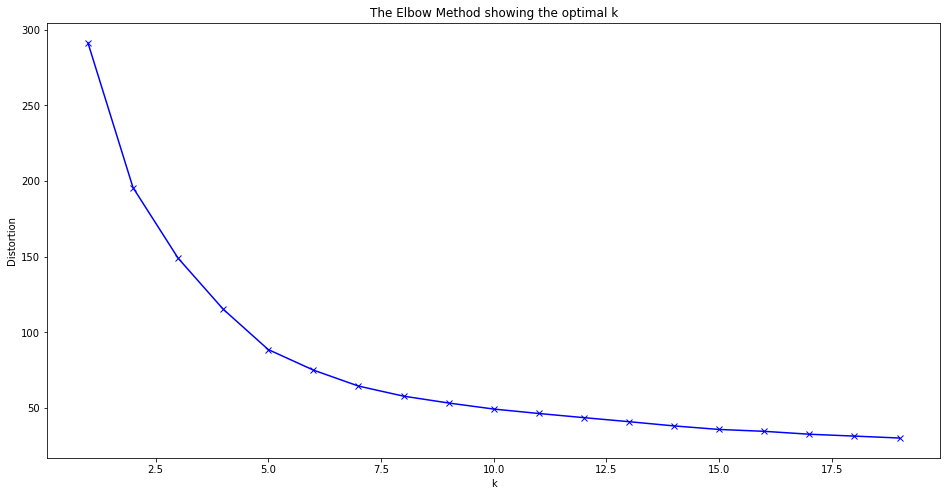

In [352]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.savefig('elbow_method.png')
plt.show()

In [354]:
# Create K-Means
k = 6
kmeanModel = KMeans(n_clusters=k)
scaler = MinMaxScaler()
kmeanModel.fit(scaler.fit_transform(listings[['latitude', 'longitude', 'price']]))

# Execute clusters
listings['price_cluster'] = kmeanModel.predict(scaler.transform(listings[['latitude', 'longitude', 'price']]))

# Create Figure
import plotly.express as px
px.set_mapbox_access_token(open("mapbox_token.txt").read())
fig = px.scatter_mapbox(
    lat= listings["latitude"], lon= listings["longitude"], color= listings["price_cluster"].astype(str),
    zoom= 10, width= 550, height= 650)

In [325]:
fig.show()

In [321]:
# Create K-Means
k = 7
kmeanModel = KMeans(n_clusters=k)
scaler = MinMaxScaler()
kmeanModel.fit(scaler.fit_transform(listings[['latitude', 'longitude', 'price']]))

# Execute clusters
listings['price_cluster'] = kmeanModel.predict(scaler.transform(listings[['latitude', 'longitude', 'price']]))

# Create Figure
import plotly.express as px
px.set_mapbox_access_token(open("mapbox_token.txt").read())
fig = px.scatter_mapbox(
    lat= listings["latitude"], lon= listings["longitude"], color= listings["price_cluster"].astype(str),
    zoom= 10, width= 550, height= 650)

In [327]:
fig.show()

In [323]:
listings.groupby(['price_cluster']).agg(
    {
        'id': 'count',
        'price': ['min', 'max', 'mean'],
        'accommodates': 'mean',
        'bathrooms': 'mean',
        'bedrooms': 'mean',
        'beds': 'mean'
    }
).round(1)

id  price                accommodates bathrooms bedrooms beds
              count    min     max   mean         mean      mean     mean mean
price_cluster                                                                 
0               553   28.0   400.0   98.5          3.1       1.2      1.3  1.7
1              1154   22.0   375.0  118.6          3.0       1.2      1.1  1.5
2               282   30.0   495.0  123.8          3.5       1.3      1.5  1.9
3               801   35.0   300.0  133.6          3.3       1.2      1.2  1.7
4               285   25.0   375.0   90.9          3.2       1.2      1.3  1.6
5               142  295.0  1000.0  438.5          7.4       2.4      3.2  3.9
6               601   20.0   450.0  111.8          3.4       1.3      1.4  1.8

# At what time do hosts tend to raise prices and which regions have the biggest price rises?

#### To answer this question we are going to look at the mean price of the available rooms by month

In [355]:
calendar[calendar.available == 't'].groupby(calendar.date.dt.month).price.mean().reset_index().head(1)

,date,price
0,1,122.912176


In [330]:
fig = px.line(
    calendar[calendar.available == 't'].groupby(calendar.date.dt.month).price.mean().reset_index(
    ).rename(columns= {'date': 'Month', 'price': 'Mean Price'}),
    x= 'Month', y= 'Mean Price', title= 'Mean Price')
fig.show()

#### Since we don't have the price of the non-available rooms we can also look at the difference between the actual price of the room and the max price register by month.

In [19]:
max_price_by_month = calendar.groupby([calendar.listing_id, calendar.date.dt.month]).price.max().reset_index()

In [20]:
max_price_by_month = max_price_by_month.merge(listings[['id', 'price']], how= 'left', left_on= 'listing_id', right_on= 'id')[[
    'listing_id', 'date', 'price_x', 'price_y']].rename(columns= {'price_x': 'room_price_by_month', 'price_y': 'room_price'})

In [21]:
max_price_by_month['price_growth'] = max_price_by_month['room_price_by_month'] / max_price_by_month['room_price']

In [334]:
max_price_by_month.groupby(['date']).price_growth.mean().reset_index().head(1)

,date,price_growth
0,1,1.098632


In [335]:
fig = px.line(
    max_price_by_month.groupby(['date']).price_growth.mean().reset_index(
    ).rename(columns= {'date': 'Month', 'price_growth': 'Price Growth'}),
    x= 'Month', y= 'Price Growth', title= 'Price Growth by Month')
fig.show()

In [190]:
max_price_by_neighbourhood = max_price_by_month.merge(
    listings[['id', 'neighbourhood_cleansed']],
    how= 'left',
    left_on= 'listing_id',
    right_on= 'id'
).drop(
    columns = ['id']
)

In [356]:
max_price_by_neighbourhood.groupby('neighbourhood_cleansed').price_growth.max(
).sort_values(ascending= False).reset_index().head(1)

,neighbourhood_cleansed,price_growth
0,West Queen Anne,8.378378


### Filtering the top 10

In [236]:
top_price_growth_neighbourhood = max_price_by_neighbourhood.groupby('neighbourhood_cleansed').price_growth.max(
).sort_values(ascending= False).reset_index().head(10).neighbourhood_cleansed.to_list()

In [343]:
px.set_mapbox_access_token(open("mapbox_token.txt").read())
fig = px.scatter_mapbox( #[listings.neighbourhood_cleansed == 'Georgetown']
    listings[listings.neighbourhood_cleansed.isin(top_price_growth_neighbourhood)].groupby(
        'neighbourhood_cleansed')[['latitude', 'longitude', 'price']].mean().reset_index(),
    lat= "latitude", lon= "longitude", color= 'price', size= 'price',
    zoom= 10, width= 550, height= 650, title= 'Top 10 neighborhoods with the highest price increase')

In [344]:
fig.show()